#1.0 MNIST

In [ ]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import normalized_mutual_info_score

In [ ]:
import urllib.request
# Download MNIST dataset
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
urllib.request.urlretrieve(url, 'mnist.npz')

('mnist.npz', <http.client.HTTPMessage at 0x7ac36bd89240>)

## 0.0 Loading the dataset

In [ ]:
# Load MNIST dataset
with np.load('mnist.npz') as data:
  X_train, y_train = data['x_train'], data['y_train']
  x_test, y_test = data['x_test'], data['y_test']

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Flattening the  dataset
X_train=X_train.reshape(len(X_train),-1)
X_train.shape

(60000, 784)

In [ ]:
# Flattening the test dataset to test on it
X_test=x_test.reshape(len(x_test),-1)
X_test.shape

(10000, 784)

In [ ]:
# Apply PCA with
pca = PCA(784)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(60000, 784)

## 1.0 K-means

In [ ]:
kmeans = KMeans(n_clusters=10,n_init=10,random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [ ]:
# Finding the majority class of each cluster
cluster_labels = []
for i in range(10):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))

In [ ]:
# Finding predictions
cluster_indices = kmeans.predict(X_test_pca)
y_pred = np.array(cluster_labels)[cluster_indices]

In [ ]:
# Finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5943


In [ ]:
nmi_score = normalized_mutual_info_score(y_test,y_pred)
print(nmi_score)

0.5159648206081419


In [ ]:
color_palette = {i: sns.color_palette('tab10')[i] for i in range(10)}

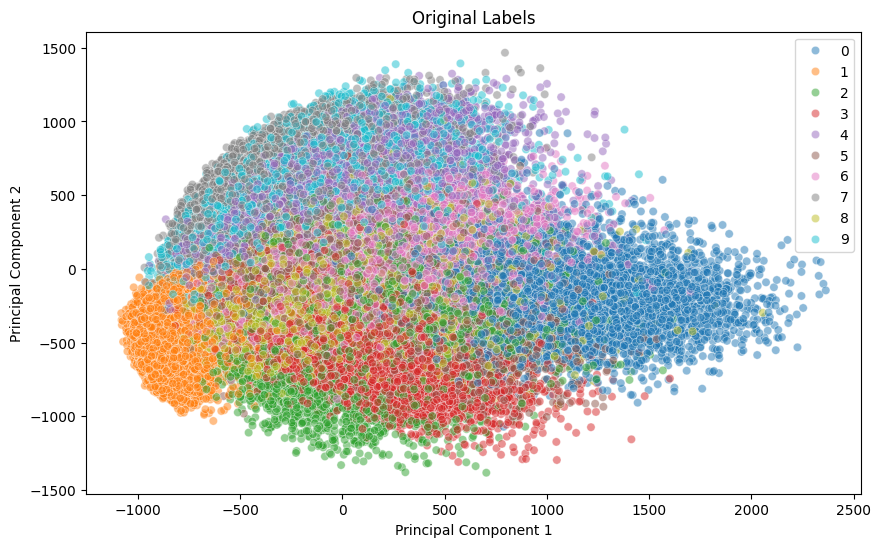

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=color_palette, legend='full', alpha=0.5)
plt.title('Original Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
cluster_labels

[1, 2, 1, 8, 0, 7, 3, 0, 4, 6]

In [ ]:
kmeans.labels_

array([3, 7, 8, ..., 3, 9, 0], dtype=int32)

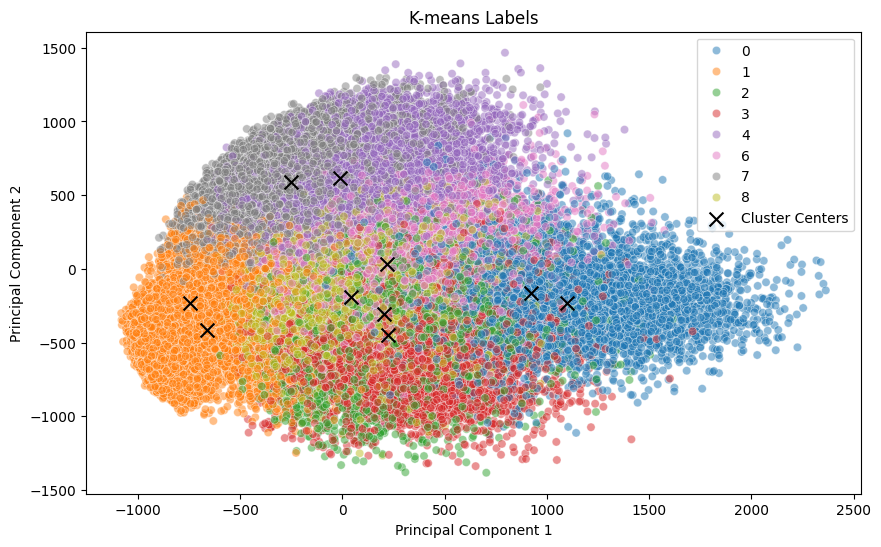

In [ ]:
# Visualize K-means labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=[cluster_labels[i] for i in kmeans.labels_], palette=color_palette, legend='full', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Cluster Centers')
plt.title('K-means Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

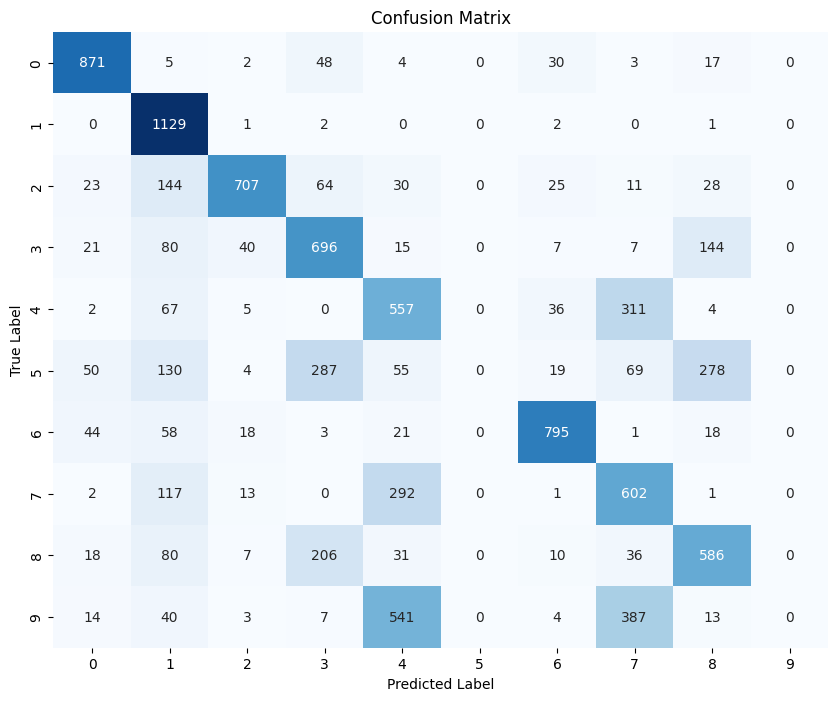

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 1.1 Number of features

In [ ]:
def calculate_accuracy(n_components,x_train_pca,y_train,X_test_pca,y_test):
  kmeans = KMeans(n_clusters=10,n_init=10)
  kmeans.fit(x_train_pca)
  cluster_labels = []
  for i in range(10):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
  cluster_indices = kmeans.predict(X_test_pca)
  y_pred = np.array(cluster_labels)[cluster_indices]
  accuracy = accuracy_score(y_test, y_pred)
  nmi_score = normalized_mutual_info_score(y_test,y_pred)
  return accuracy,nmi_score

In [ ]:
accuracy=[]
nmi_score=[]

In [ ]:
for p in tqdm(range(1,100,5)):
  acc,nmi=calculate_accuracy(p,X_train_pca[:,:p+1],y_train,X_test_pca[:,:p+1],y_test)
  print(p,acc,nmi)
  accuracy.append(acc)
  nmi_score.append(nmi)

  5%|▌         | 1/20 [00:06<02:09,  6.81s/it]

1 0.4009 0.3829783042277958


 10%|█         | 2/20 [00:17<02:40,  8.94s/it]

6 0.5742 0.4792028025200852


 15%|█▌        | 3/20 [00:26<02:35,  9.16s/it]

11 0.5781 0.4888964536374801


 20%|██        | 4/20 [00:31<02:00,  7.53s/it]

16 0.5877 0.5041819558342339


 25%|██▌       | 5/20 [00:37<01:43,  6.88s/it]

21 0.5883 0.5123162954033429


 30%|███       | 6/20 [00:42<01:26,  6.18s/it]

26 0.5869 0.5156317829522381


 35%|███▌      | 7/20 [00:48<01:21,  6.25s/it]

31 0.5884 0.5165762922734741


 40%|████      | 8/20 [00:55<01:18,  6.56s/it]

36 0.5835 0.5006756292738982


 45%|████▌     | 9/20 [01:06<01:25,  7.80s/it]

41 0.5943 0.5152877732974528


 50%|█████     | 10/20 [01:14<01:20,  8.04s/it]

46 0.5949 0.516074651731564


 55%|█████▌    | 11/20 [01:25<01:18,  8.77s/it]

51 0.5946 0.5158794191641911


 60%|██████    | 12/20 [01:37<01:18,  9.80s/it]

56 0.5941 0.5157053635790577


 65%|██████▌   | 13/20 [01:49<01:12, 10.33s/it]

61 0.5942 0.5155785307289515


 70%|███████   | 14/20 [02:00<01:03, 10.59s/it]

66 0.5936 0.5199236563982256


 75%|███████▌  | 15/20 [02:13<00:57, 11.41s/it]

71 0.5891 0.5179772785940323


 80%|████████  | 16/20 [02:26<00:47, 11.88s/it]

76 0.5942 0.5156062868224874


 85%|████████▌ | 17/20 [02:38<00:35, 12.00s/it]

81 0.5943 0.5161214211821297


 90%|█████████ | 18/20 [02:55<00:26, 13.49s/it]

86 0.5944 0.5163402243038318


 95%|█████████▌| 19/20 [03:10<00:13, 13.78s/it]

91 0.5944 0.5163602669446022


100%|██████████| 20/20 [03:25<00:00, 10.26s/it]

96 0.5942 0.5161686945292284


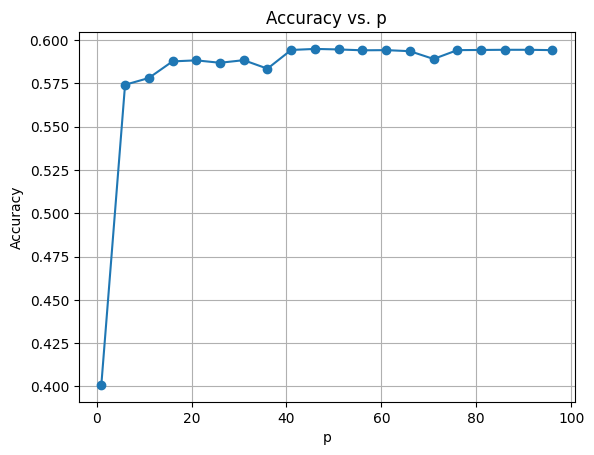

In [ ]:
p_values=[(1+5*i) for i in range(20)]
plt.plot(p_values, accuracy, marker='o', linestyle='-')
plt.title('Accuracy vs. p')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

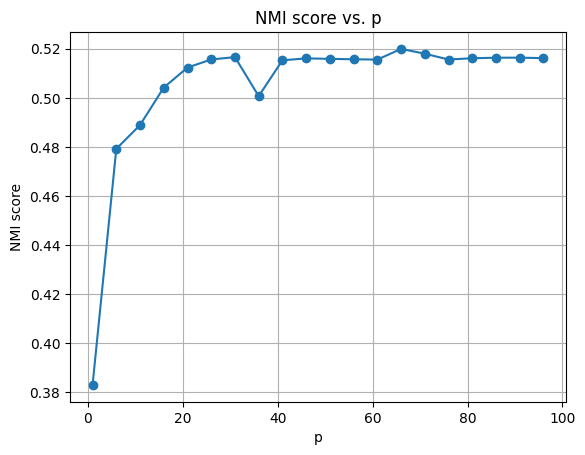

In [ ]:
p_values=[(1+5*i) for i in range(20)]
plt.plot(p_values, nmi_score, marker='o', linestyle='-')
plt.title('NMI score vs. p')
plt.xlabel('p')
plt.ylabel('NMI score')
plt.grid(True)
plt.show()

### 1.2 Number of Cluster

In [ ]:
# Apply PCA with
n_components=40
X_train_pca_red = X_train_pca[:,:n_components]

In [ ]:
X_train_pca_red.shape

(60000, 40)

In [ ]:
# Perform K-means clustering on the PCA-transformed training data
accuracy_clusters=[]
nmi_clusters=[]
for num_clusters in tqdm(range(10,51,5)):
  kmeans = KMeans(n_clusters=num_clusters,n_init=10)
  kmeans.fit(X_train_pca_red)
  # Assign class labels to clusters based on majority vote
  cluster_labels = []
  for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
  cluster_indices = kmeans.predict(X_test_pca[:,:40])
  y_pred = np.array(cluster_labels)[cluster_indices]
  # Calculate accuracy on the val set
  accuracy_val = accuracy_score(y_test, y_pred)
  nmi_score = normalized_mutual_info_score(y_test,y_pred)
  print(accuracy_val,nmi_score)
  accuracy_clusters.append(accuracy_val)
  nmi_clusters.append(nmi_score)

 11%|█         | 1/9 [00:09<01:19, 10.00s/it]

0.594 0.514868021015884


 22%|██▏       | 2/9 [00:23<01:26, 12.29s/it]

0.6774 0.5749550569850058


 33%|███▎      | 3/9 [00:34<01:10, 11.73s/it]

0.7148 0.6200342803835605


 44%|████▍     | 4/9 [00:53<01:11, 14.39s/it]

0.7503 0.6520063621833262


 56%|█████▌    | 5/9 [01:13<01:06, 16.61s/it]

0.7615 0.6653202778285369


 67%|██████▋   | 6/9 [01:33<00:52, 17.43s/it]

0.8002 0.6983943892690324


 78%|███████▊  | 7/9 [01:57<00:39, 19.65s/it]

0.8006 0.6998806003313304


 89%|████████▉ | 8/9 [02:31<00:24, 24.16s/it]

0.8176 0.7157094166444945


100%|██████████| 9/9 [03:16<00:00, 21.82s/it]

0.8223 0.7163498786454988


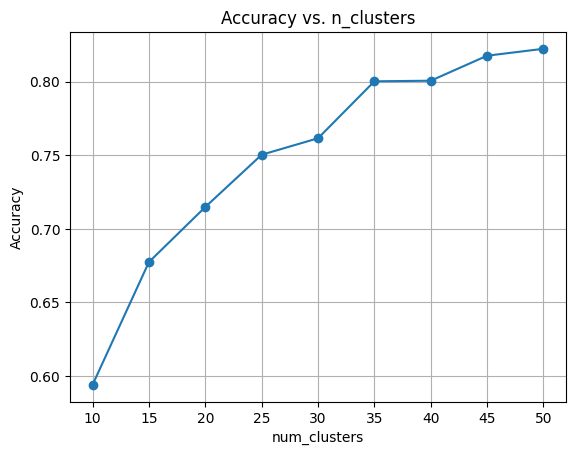

In [ ]:
num_clusters_arr=[(5*i)+10 for i in range(len(accuracy_clusters))]
plt.plot(num_clusters_arr, accuracy_clusters, marker='o', linestyle='-')
plt.title('Accuracy vs. n_clusters')
plt.xlabel('num_clusters')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

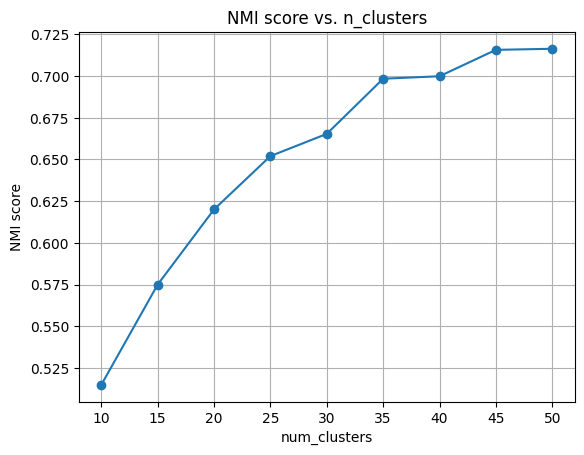

In [ ]:
num_clusters_arr=[(5*i)+10 for i in range(len(accuracy_clusters))]
plt.plot(num_clusters_arr, nmi_clusters, marker='o', linestyle='-')
plt.title('NMI score vs. n_clusters')
plt.xlabel('num_clusters')
plt.ylabel('NMI score')
plt.grid(True)
plt.show()

## 2.0 AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
p=40

In [ ]:
n_clusters = 10  # You can choose the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])

In [ ]:
X_train_pca[:,:p].shape

(60000, 40)

In [ ]:
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))

In [ ]:
y_pred = np.array(cluster_labels)[cluster_indices]
y_pred.shape

(10000,)

In [ ]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1136


In [ ]:
nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
print(nmi_score)

0.0018383974962341528


In [ ]:
p=40
n_clusters = 10  # You can choose the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)
nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
print(nmi_score)

Accuracy: 0.461
0.4226319637655612


In [ ]:
p=40
n_clusters = 10  # You can choose the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)
nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
print(nmi_score)

Accuracy: 0.3052
0.32415888979317575


In [ ]:
for p in range(10,100,5):
  n_clusters = 10  # You can choose the number of clusters
  clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
  cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
  cluster_labels = []
  for i in range(n_clusters):
    cluster_indices_temp = np.where(clustering.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
  y_pred = np.array(cluster_labels)[cluster_indices]
  accuracy = accuracy_score(y_train[:10000], y_pred)
  print("Accuracy:", accuracy)
  nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
  print(nmi_score)

Accuracy: 0.6521
0.5817934441877177
Accuracy: 0.635
0.6008821766549381
Accuracy: 0.6936
0.6690873274955705
Accuracy: 0.6501
0.6385823665523878
Accuracy: 0.5976
0.6211756545079146
Accuracy: 0.6673
0.6748495048951886
Accuracy: 0.713
0.7113207081778452
Accuracy: 0.7157
0.6887544964500402
Accuracy: 0.671
0.6728015694363101
Accuracy: 0.678
0.6861306401723605
Accuracy: 0.681
0.6985668906676672
Accuracy: 0.7182
0.6905167187774878
Accuracy: 0.6617
0.6433294869631374
Accuracy: 0.6983
0.6975624058601652
Accuracy: 0.7129
0.6896775564799871
Accuracy: 0.6138
0.6148552593328183
Accuracy: 0.7157
0.6925781304062786
Accuracy: 0.6685
0.6811874130148833


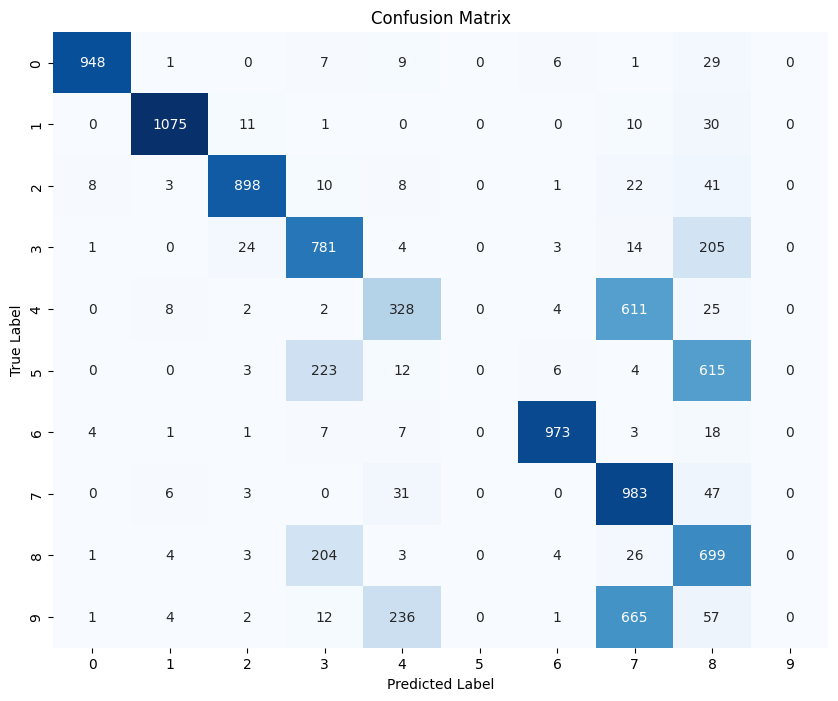

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train[:10000],y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Since ward gives good result we try it with different values of p
accuracy_arr=[]
for p in tqdm(range(1,41,5)):
  n_clusters = 10  # You can choose the number of clusters
  clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
  cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
  cluster_labels = []
  for i in range(n_clusters):
    cluster_indices_temp = np.where(clustering.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
  y_pred = np.array(cluster_labels)[cluster_indices]
  accuracy = accuracy_score(y_train[:10000], y_pred)
  print("Accuracy:", accuracy)
  accuracy_arr.append(accuracy)

 12%|█▎        | 1/8 [00:09<01:05,  9.40s/it]

Accuracy: 0.3082


 25%|██▌       | 2/8 [00:19<00:58,  9.68s/it]

Accuracy: 0.5272


 38%|███▊      | 3/8 [00:25<00:39,  7.92s/it]

Accuracy: 0.6098


 50%|█████     | 4/8 [00:32<00:30,  7.53s/it]

Accuracy: 0.6967


 62%|██████▎   | 5/8 [00:39<00:22,  7.39s/it]

Accuracy: 0.6349


 75%|███████▌  | 6/8 [00:46<00:14,  7.21s/it]

Accuracy: 0.6159


 88%|████████▊ | 7/8 [00:53<00:07,  7.29s/it]

Accuracy: 0.6593


100%|██████████| 8/8 [01:00<00:00,  7.52s/it]

Accuracy: 0.6196


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import accuracy_score

p = 40
n_clusters = 10

birch = Birch(n_clusters=n_clusters)
birch.fit(X_train_pca[:10000,:p])
cluster_indices = birch.predict(X_train_pca[:10000,:p])

cluster_labels = []
for i in range(n_clusters):
    cluster_indices_temp = np.where(cluster_indices == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))

y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.713


#2.0 MNSIT Autoencoder

In [1]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.metrics import normalized_mutual_info_score

In [3]:
import urllib.request
# Download MNIST dataset
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
urllib.request.urlretrieve(url, 'mnist.npz')

('mnist.npz', <http.client.HTTPMessage at 0x7edc5e119ed0>)

In [4]:
# Load MNIST dataset
with np.load('mnist.npz') as data:
  x_train = data['x_train']
  y_train = data['y_train']
  x_test = data['x_test']
  y_test = data['y_test']

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


##2.1 Autoencoder

In [5]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape).numpy(), activation='sigmoid'),
      layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = x_test.shape[1:]
latent_dim = 10
autoencoder = Autoencoder(latent_dim, shape)

In [6]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.0480 - val_loss: 0.0344
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0334 - val_loss: 0.0320
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - val_loss: 0.0309
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0311 - val_loss: 0.0304
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0306 - val_loss: 0.0301
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0304 - val_loss: 0.0299
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0302 - val_loss: 0.0298
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0301 - val_loss: 0.0297
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0300 - val_loss: 0.0296
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03

In [8]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

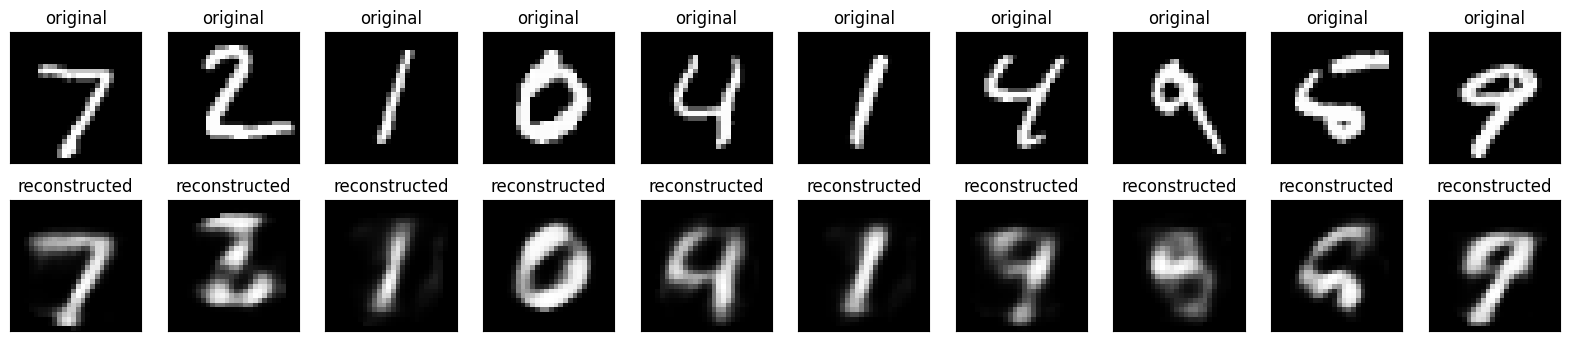

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
encoded_x_train=autoencoder.encoder(x_train).numpy()

In [11]:
encoded_x_train.shape

(60000, 10)

In [12]:
mean = np.mean(encoded_x_train, axis=0)
std = np.std(encoded_x_train, axis=0)

# Normalize the array
normalized_x_train = (encoded_x_train - mean) / std

In [14]:
kmeans = KMeans(n_clusters=10,n_init=10)
kmeans.fit(encoded_x_train)

KMeans(n_clusters=10, n_init=10)

In [15]:
# Finding the majority class of each cluster
cluster_labels = []
for i in range(10):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))

In [16]:
# Finding predictions
cluster_indices = kmeans.predict(encoded_x_train)
y_pred = np.array(cluster_labels)[cluster_indices]

In [17]:
# Finding accuracy
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.44915


In [20]:
nmi_score = normalized_mutual_info_score(y_train,y_pred)
print(nmi_score)

0.33921623198631656


##2.2 Convolution Autoencoder

In [ ]:
class Autoencoder(Model):
    def __init__(self, input_shape):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(16, (3, 3), activation='relu'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_shape = (28, 28, 1)
autoencoder = Autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

with np.load('mnist.npz') as data:
  x_train = data['x_train']
  y_train = data['y_train']
  x_test = data['x_test']
  y_test = data['y_test']

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 78s 162ms/step - loss: 0.2187 - val_loss: 0.1476
Epoch 2/50
469/469 [==============================] - 77s 163ms/step - loss: 0.1358 - val_loss: 0.1262
Epoch 3/50
469/469 [==============================] - 74s 159ms/step - loss: 0.1232 - val_loss: 0.1187
Epoch 4/50
469/469 [==============================] - 73s 156ms/step - loss: 0.1174 - val_loss: 0.1143
Epoch 5/50
469/469 [==============================] - 75s 160ms/step - loss: 0.1141 - val_loss: 0.1117
Epoch 6/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1117 - val_loss: 0.1093
Epoch 7/50
469/469 [==============================] - 76s 163ms/step - loss: 0.1099 - val_loss: 0.1086
Epoch 8/50
469/469 [==============================] - 77s 165ms/step - loss: 0.1084 - val_loss: 0.1064
Epoch 9/50
469/469 [==============================] - 73s 156ms/step - loss: 0.1071 - val_loss: 0.1052
Epoch 10/50
469/469 [==============================] - 73s 156ms/step - l

313/313 [==============================] - 4s 13ms/step


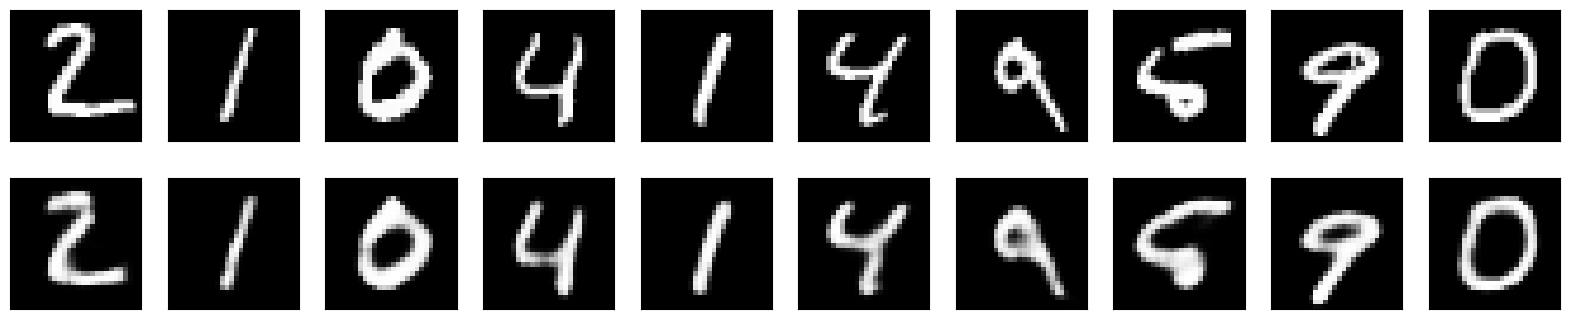

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded_x_train=autoencoder.encoder(x_train).numpy()

In [ ]:
kmeans = KMeans(n_clusters=10,n_init=10)
encoded_x_train=encoded_x_train.reshape(len(encoded_x_train),-1)
kmeans.fit(encoded_x_train)

KMeans(n_clusters=10, n_init=10)

In [ ]:
# Finding the majority class of each cluster
cluster_labels = []
for i in range(10):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))

In [ ]:
# Finding predictions
cluster_indices = kmeans.predict(encoded_x_train)
y_pred = np.array(cluster_labels)[cluster_indices]

In [ ]:
# Finding accuracy
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.44885


##2.3 Autoencoder with Gaussian noise

In [21]:
# Load MNIST dataset
with np.load('mnist.npz') as data:
  x_train = data['x_train']
  y_train = data['y_train']
  x_test = data['x_test']
  y_test = data['y_test']


In [22]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [23]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

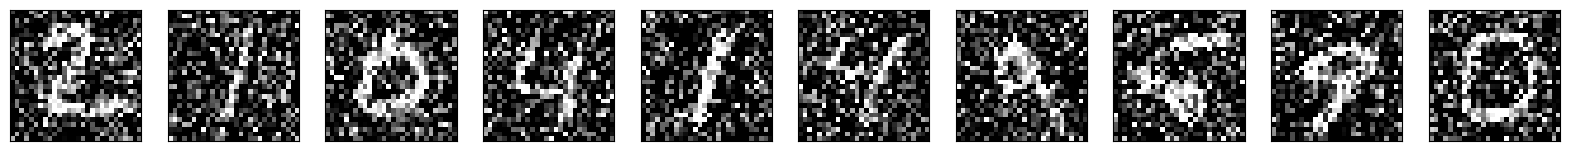

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
class Autoencoder(Model):
    def __init__(self, input_shape):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2), padding='same')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

input_shape = (28, 28, 1)
autoencoder = Autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1213 - val_loss: 0.1123
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1106 - val_loss: 0.1069
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1064 - val_loss: 0.1041
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1039 - val_loss: 0.1022
Epoch 5/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1022 - val_loss: 0.1008
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1011 - val_loss: 0.0997
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1001 - val_loss: 0.0990
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0994 - val_loss: 0.0982
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0988 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0983 - 

313/313 [==============================] - 1s 3ms/step


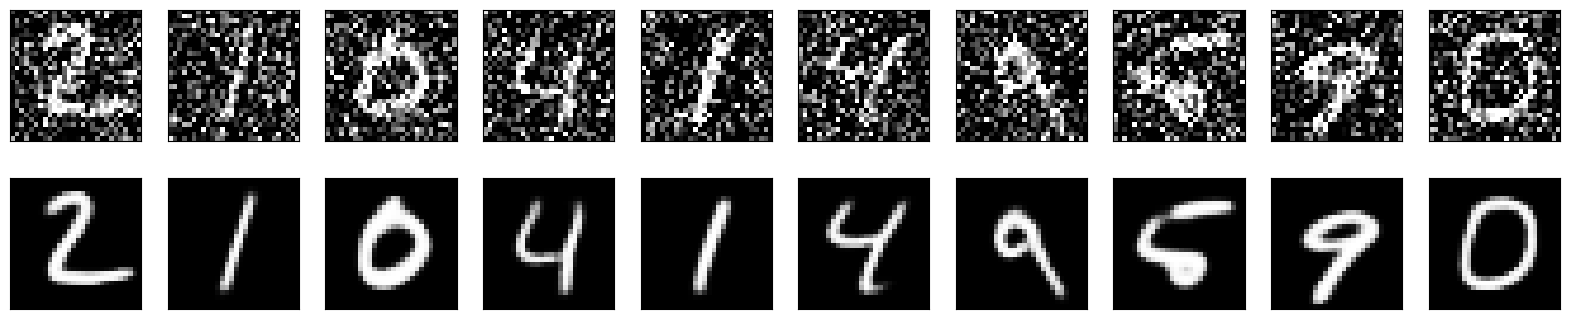

In [28]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
encoded_x_train=autoencoder.encoder.predict(x_train)
kmeans = KMeans(n_clusters=10,n_init=10)
encoded_x_train=encoded_x_train.reshape(len(encoded_x_train),-1)
kmeans.fit(encoded_x_train)


1875/1875 [==============================] - 3s 1ms/step


KMeans(n_clusters=10, n_init=10)

In [30]:
# Finding the majority class of each cluster
cluster_labels = []
for i in range(10):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
# Finding predictions
cluster_indices = kmeans.predict(encoded_x_train)
y_pred = np.array(cluster_labels)[cluster_indices]
# Finding accuracy
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.6388333333333334


In [31]:
nmi_score = normalized_mutual_info_score(y_train,y_pred)
print(nmi_score)

0.5585869429446428


In [33]:
from sklearn.cluster import AgglomerativeClustering

###2.3.1 Hierchial Clustering for Classification

In [40]:
n_clusters = 10  # You can choose the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
num_training_examples=15000
cluster_indices=clustering.fit_predict(encoded_x_train[:num_training_examples])
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:num_training_examples], y_pred)
print("Accuracy:", accuracy)
nmi_score = normalized_mutual_info_score(y_train[:num_training_examples],y_pred)
print(nmi_score)

Accuracy: 0.7290666666666666
0.726328587701661


#3.0 Fashion MNIST

In [ ]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import normalized_mutual_info_score


## 3.1 Loading the dataset

In [ ]:
(X_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Flattening the  dataset
X_train=X_train.reshape(len(X_train),-1)
X_train.shape

(60000, 784)

In [ ]:
# Flattening the test dataset to test on it
X_test=x_test.reshape(len(x_test),-1)
X_test.shape

(10000, 784)

In [ ]:
# Apply PCA with
pca = PCA(784)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(60000, 784)

## 3.2 K-means

In [ ]:
kmeans = KMeans(n_clusters=10,n_init=10,random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [ ]:
# Finding the majority class of each cluster
cluster_labels = []
for i in range(10):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))

In [ ]:
# Finding predictions
cluster_indices = kmeans.predict(X_test_pca)
y_pred = np.array(cluster_labels)[cluster_indices]

In [ ]:
# Finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5599


In [ ]:
nmi_score = normalized_mutual_info_score(y_test,y_pred)
print(nmi_score)

0.5249117906383601


In [ ]:
# Define a color palette dictionary mapping class labels to colors
color_palette = {i: sns.color_palette('tab10')[i] for i, class_name in enumerate(class_names)}

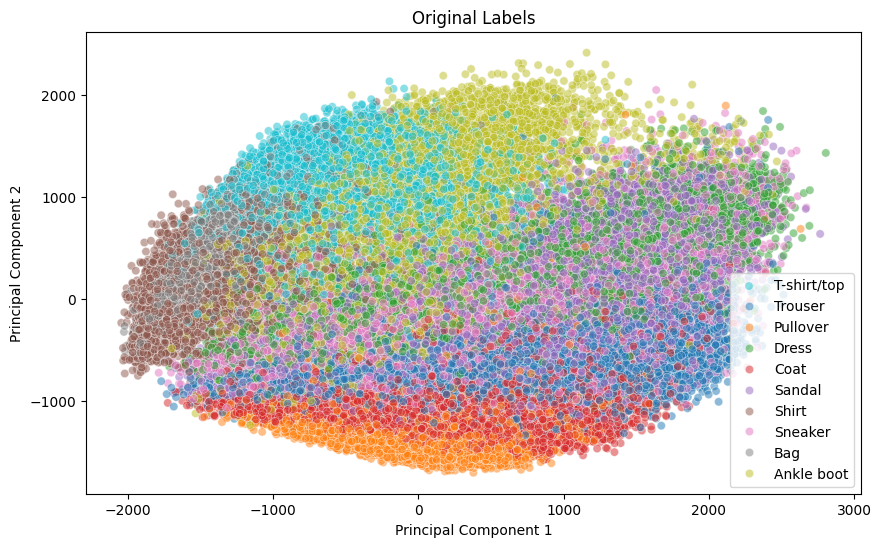

In [ ]:
# Plot scatter plot with class names in the legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette= color_palette, legend='full', alpha=0.5)
plt.title('Original Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=class_names)  # Add class names to the legend
plt.show()

In [ ]:
cluster_labels

[9, 7, 4, 9, 1, 0, 5, 8, 6, 8]

In [ ]:
kmeans.labels_

array([0, 5, 6, ..., 5, 6, 6], dtype=int32)

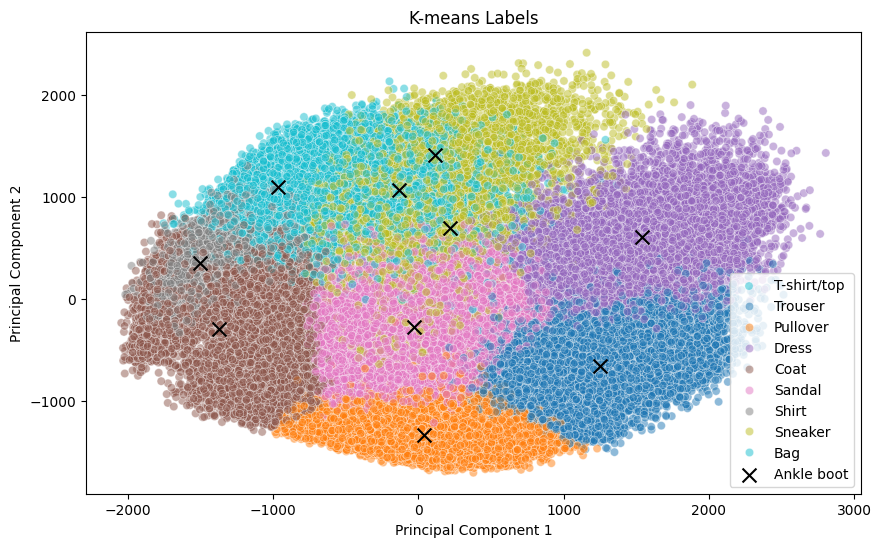

In [ ]:
# Visualize K-means labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=[cluster_labels[i] for i in kmeans.labels_], palette=color_palette, legend='full', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Cluster Centers')
plt.title('K-means Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=class_names)
plt.show()

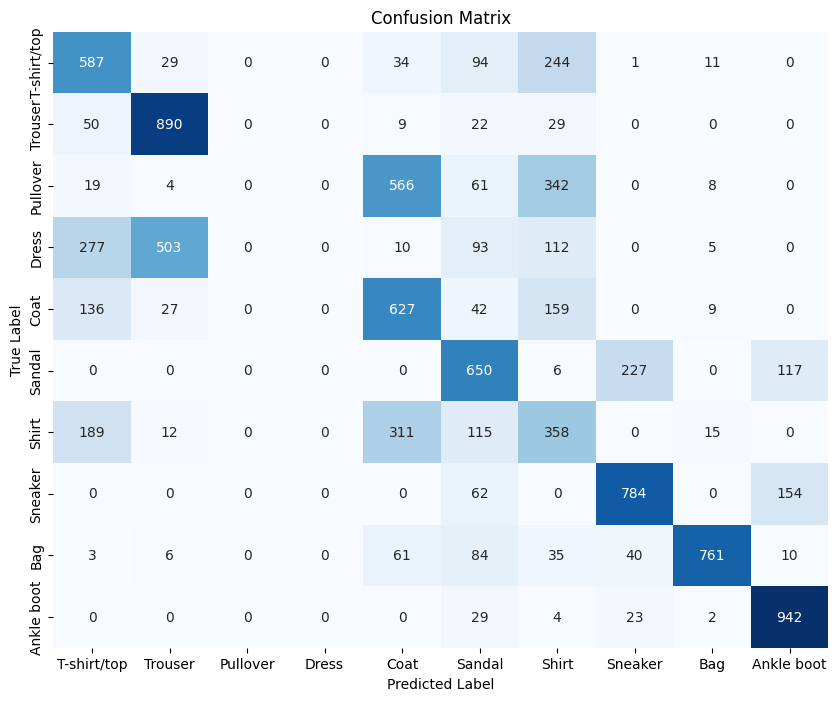

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 3.2.1 Number of features

In [ ]:
def calculate_accuracy(n_components,x_train_pca,y_train,X_test_pca,y_test):
  kmeans = KMeans(n_clusters=10,n_init=10)
  kmeans.fit(x_train_pca)
  cluster_labels = []
  for i in range(10):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
  cluster_indices = kmeans.predict(X_test_pca)
  y_pred = np.array(cluster_labels)[cluster_indices]
  accuracy = accuracy_score(y_test, y_pred)
  nmi_score = normalized_mutual_info_score(y_test,y_pred)
  return accuracy,nmi_score

In [ ]:
accuracy=[]
nmi_score=[]

In [ ]:
for p in tqdm(range(1,100,5)):
  acc,nmi=calculate_accuracy(p,X_train_pca[:,:p+1],y_train,X_test_pca[:,:p+1],y_test)
  print(p,acc,nmi)
  accuracy.append(acc)
  nmi_score.append(nmi)

  5%|▌         | 1/20 [00:02<00:39,  2.10s/it]

1 0.4433 0.41687359937558016


 10%|█         | 2/20 [00:04<00:40,  2.25s/it]

6 0.5822 0.5241079200993801


 15%|█▌        | 3/20 [00:09<00:59,  3.53s/it]

11 0.5571 0.5218896058462807


 20%|██        | 4/20 [00:12<00:51,  3.22s/it]

16 0.5583 0.5223247400585549


 25%|██▌       | 5/20 [00:16<00:51,  3.44s/it]

21 0.5601 0.5245308629939376


 30%|███       | 6/20 [00:22<01:03,  4.55s/it]

26 0.5601 0.5251294234659908


 35%|███▌      | 7/20 [00:27<00:59,  4.61s/it]

31 0.5933 0.5355717666649336


 40%|████      | 8/20 [00:32<00:54,  4.58s/it]

36 0.5213 0.5160038175696652


 45%|████▌     | 9/20 [00:40<01:02,  5.65s/it]

41 0.5597 0.5247420643645158


 50%|█████     | 10/20 [00:47<01:03,  6.34s/it]

46 0.5601 0.525304521476326


 55%|█████▌    | 11/20 [00:54<00:58,  6.52s/it]

51 0.5589 0.5238306795660924


 60%|██████    | 12/20 [01:06<01:04,  8.06s/it]

56 0.5804 0.5194150692778934


 65%|██████▌   | 13/20 [01:17<01:02,  8.96s/it]

61 0.56 0.5250442608916799


 70%|███████   | 14/20 [01:25<00:52,  8.70s/it]

66 0.5602 0.5251767319504774


 75%|███████▌  | 15/20 [01:36<00:46,  9.40s/it]

71 0.5462 0.4903634765450289


 80%|████████  | 16/20 [01:47<00:39,  9.95s/it]

76 0.5601 0.5250740098371867


 85%|████████▌ | 17/20 [01:57<00:29,  9.76s/it]

81 0.5799 0.5190839527561675


 90%|█████████ | 18/20 [02:05<00:18,  9.43s/it]

86 0.5598 0.5246191952012882


 95%|█████████▌| 19/20 [02:20<00:11, 11.10s/it]

91 0.5603 0.5253418756606704


100%|██████████| 20/20 [02:35<00:00,  7.79s/it]

96 0.5602 0.5252175134687476


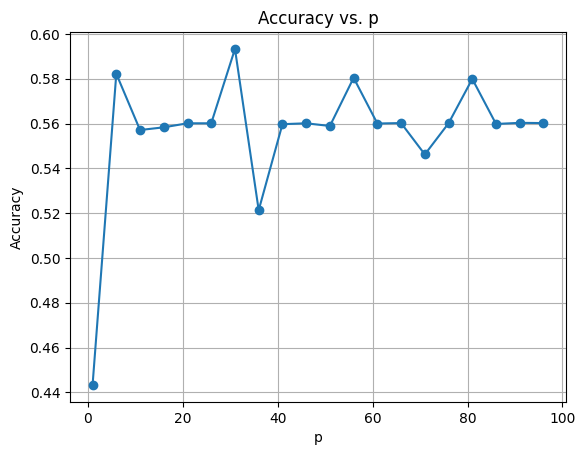

In [ ]:
p_values=[(1+5*i) for i in range(20)]
plt.plot(p_values, accuracy, marker='o', linestyle='-')
plt.title('Accuracy vs. p')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

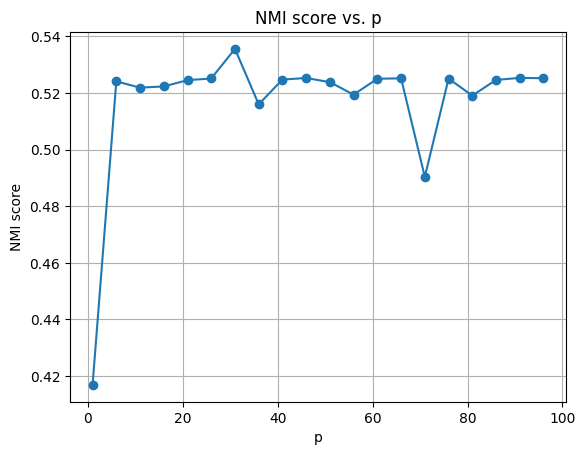

In [ ]:
p_values=[(1+5*i) for i in range(20)]
plt.plot(p_values, nmi_score, marker='o', linestyle='-')
plt.title('NMI score vs. p')
plt.xlabel('p')
plt.ylabel('NMI score')
plt.grid(True)
plt.show()

### 3.2.2 Number of Cluster

In [ ]:
# Apply PCA with
n_components=30
X_train_pca_red = X_train_pca[:,:n_components]

In [ ]:
X_train_pca_red.shape

(60000, 30)

In [ ]:
# Perform K-means clustering on the PCA-transformed training data
accuracy_clusters=[]
nmi_clusters=[]
for num_clusters in tqdm(range(10,51,5)):
  kmeans = KMeans(n_clusters=num_clusters,n_init=10)
  kmeans.fit(X_train_pca_red)
  # Assign class labels to clusters based on majority vote
  cluster_labels = []
  for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
  cluster_indices = kmeans.predict(X_test_pca[:,:n_components])
  y_pred = np.array(cluster_labels)[cluster_indices]
  # Calculate accuracy on the val set
  accuracy_val = accuracy_score(y_test, y_pred)
  nmi_score = normalized_mutual_info_score(y_test,y_pred)
  print(accuracy_val,nmi_score)
  accuracy_clusters.append(accuracy_val)
  nmi_clusters.append(nmi_score)

 11%|█         | 1/9 [00:10<01:26, 10.85s/it]

0.5603 0.5254386069208358


 22%|██▏       | 2/9 [00:17<01:00,  8.59s/it]

0.6541 0.5774276845687886


 33%|███▎      | 3/9 [00:23<00:44,  7.39s/it]

0.6598 0.5844301756385231


 44%|████▍     | 4/9 [00:36<00:47,  9.49s/it]

0.6637 0.5853400208152136


 56%|█████▌    | 5/9 [00:49<00:43, 10.89s/it]

0.671 0.5920136630534034


 67%|██████▋   | 6/9 [01:09<00:41, 13.94s/it]

0.6857 0.6044480146853985


 78%|███████▊  | 7/9 [01:31<00:32, 16.36s/it]

0.6828 0.6053648525780476


 89%|████████▉ | 8/9 [01:56<00:19, 19.31s/it]

0.6876 0.6124457961894372


100%|██████████| 9/9 [02:20<00:00, 15.64s/it]

0.7052 0.6244078286985691


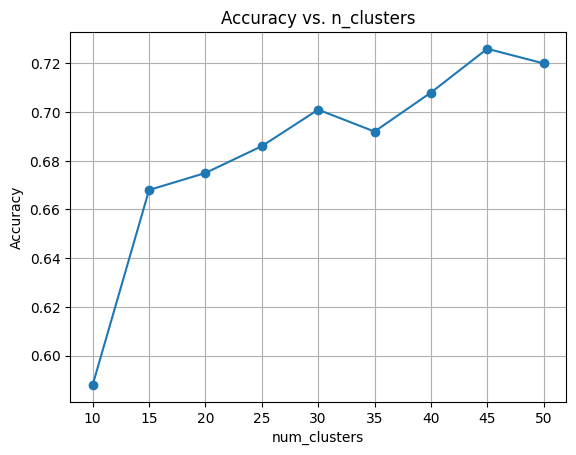

In [ ]:
num_clusters_arr=[(5*i)+10 for i in range(len(accuracy_clusters))]
plt.plot(num_clusters_arr, accuracy_clusters, marker='o', linestyle='-')
plt.title('Accuracy vs. n_clusters')
plt.xlabel('num_clusters')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

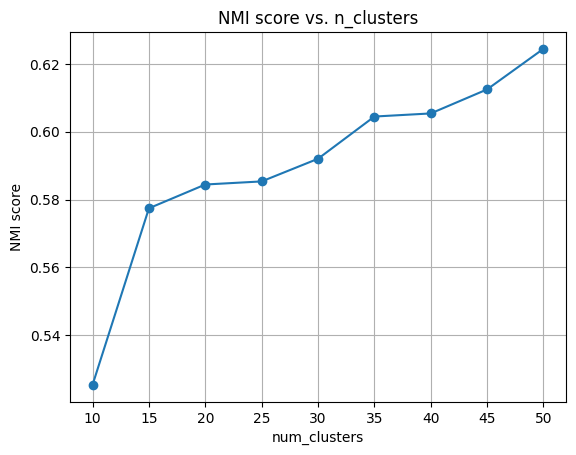

In [ ]:
num_clusters_arr=[(5*i)+10 for i in range(len(accuracy_clusters))]
plt.plot(num_clusters_arr, nmi_clusters, marker='o', linestyle='-')
plt.title('NMI score vs. n_clusters')
plt.xlabel('num_clusters')
plt.ylabel('NMI score')
plt.grid(True)
plt.show()

## 3.3 AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
p=30

In [ ]:
n_clusters = 10  # You can choose the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])

In [ ]:
X_train_pca[:,:p].shape

(60000, 30)

In [ ]:
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))

In [ ]:
y_pred = np.array(cluster_labels)[cluster_indices]
y_pred.shape

(10000,)

In [ ]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1036


In [ ]:
nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
print(nmi_score)

0.0016662610802321216


In [ ]:
n_clusters = 10  # You can choose the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)
nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
print(nmi_score)

Accuracy: 0.4663
0.4499651478975007


In [ ]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)
nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
print(nmi_score)

Accuracy: 0.4335
0.5066128280436145


In [ ]:
n_clusters = 10
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
cluster_labels = []
for i in range(n_clusters):
  cluster_indices_temp = np.where(clustering.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5212


In [ ]:
for p in range(10,100,5):
  n_clusters = 10  # You can choose the number of clusters
  clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
  cluster_indices=clustering.fit_predict(X_train_pca[:10000,:p])
  cluster_labels = []
  for i in range(n_clusters):
    cluster_indices_temp = np.where(clustering.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))
  y_pred = np.array(cluster_labels)[cluster_indices]
  accuracy = accuracy_score(y_train[:10000], y_pred)
  print("Accuracy:", accuracy)
  nmi_score = normalized_mutual_info_score(y_train[:10000],y_pred)
  print(nmi_score)

Accuracy: 0.5705
0.5790960474190844
Accuracy: 0.5533
0.5576266864185148
Accuracy: 0.5096
0.537479915349085
Accuracy: 0.5924
0.5928380736254321
Accuracy: 0.5212
0.5787784628596252
Accuracy: 0.5627
0.5847771999899242
Accuracy: 0.5311
0.5769276333048909
Accuracy: 0.5179
0.5224326348113948
Accuracy: 0.5268
0.5686126549573217
Accuracy: 0.5397
0.5579606953596922
Accuracy: 0.5785
0.5933535800282097
Accuracy: 0.5956
0.5789144875571688
Accuracy: 0.5336
0.5523748921887499
Accuracy: 0.6095
0.5990881898359057
Accuracy: 0.5984
0.5841375129038389
Accuracy: 0.6047
0.5876257277513478
Accuracy: 0.6049
0.5743919094044461
Accuracy: 0.6383
0.6123968702626753


In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import accuracy_score

p = 70
n_clusters = 10

birch = Birch(n_clusters=n_clusters)
birch.fit(X_train_pca[:10000,:p])
cluster_indices = birch.predict(X_train_pca[:10000,:p])

cluster_labels = []
for i in range(n_clusters):
    cluster_indices_temp = np.where(cluster_indices == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices_temp])))

y_pred = np.array(cluster_labels)[cluster_indices]
accuracy = accuracy_score(y_train[:10000], y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5336


# 4.0 CIFAR-10

In [ ]:
# importing neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.datasets import cifar10  # Change here
from sklearn.metrics import normalized_mutual_info_score


## 4.1 Loading the dataset

In [ ]:
# Load CIFAR-10 data
(X_train, y_train), (x_test, y_test) = cifar10.load_data()  # Change here

170498071/170498071 [==============================] - 2s 0us/step


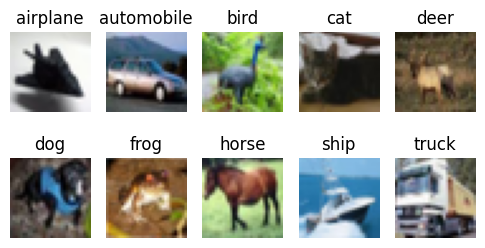

In [ ]:
# Map class labels to corresponding names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Initialize a dictionary to store one image per class
class_images = {}

# Iterate through the dataset to find one image per class
for i in range(len(class_names)):
    index = np.where(y_train == i)[0][0]
    class_images[class_names[i]] = X_train[index]

# Plot one image per class
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
for i, (class_name, image) in enumerate(class_images.items()):
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(class_name)
    ax.axis('off')

plt.show()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Flattening the  dataset
X_train=X_train.reshape(len(X_train),-1)
X_train.shape

(50000, 3072)

In [ ]:
# Flattening the test dataset to test on it
X_test=x_test.reshape(len(x_test),-1)
X_test.shape

(10000, 3072)

In [ ]:
# Apply PCA with 784 features else it takes too long too complete
pca = PCA(784)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(50000, 784)

# 4.2 K-means

In [ ]:
kmeans = KMeans(n_clusters=10,n_init=10,random_state=42)
kmeans.fit(X_train_pca)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train=y_train.reshape(len(y_train))

In [ ]:
# Finding the majority class of each cluster
cluster_labels = []
for i in range(10):
  cluster_indices = np.where(kmeans.labels_ == i)[0]
  cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))

In [ ]:
# Finding predictions
cluster_indices = kmeans.predict(X_test_pca)
y_pred = np.array(cluster_labels)[cluster_indices]

In [ ]:
# Finding accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.222


In [ ]:
y_pred.shape

(10000,)

In [ ]:
nmi_score = normalized_mutual_info_score(y_test.reshape(len(y_test),),y_pred)
print(nmi_score)

0.0752866799595724


In [ ]:
# Define a color palette dictionary mapping class labels to colors
color_palette = {i: sns.color_palette('tab10')[i] for i, class_name in enumerate(class_names)}

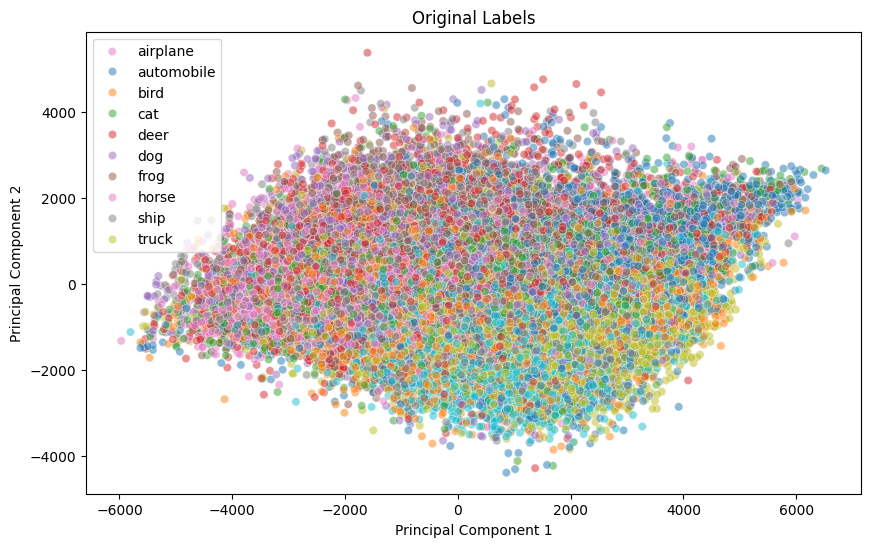

In [ ]:
# Plot scatter plot with class names in the legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette= color_palette, legend='full', alpha=0.5)
plt.title('Original Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=class_names)  # Add class names to the legend
plt.show()

In [ ]:
cluster_labels

[8, 8, 6, 9, 0, 9, 4, 2, 0, 6]

In [ ]:
kmeans.labels_

array([6, 1, 5, ..., 5, 0, 3], dtype=int32)

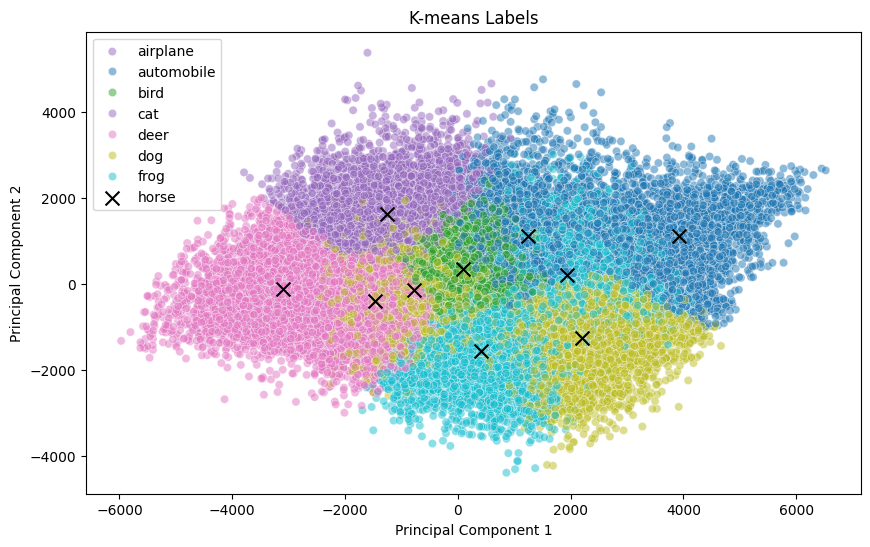

In [ ]:
# Visualize K-means labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=[cluster_labels[i] for i in kmeans.labels_], palette=color_palette, legend='full', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Cluster Centers')
plt.title('K-means Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(labels=class_names)
plt.show()

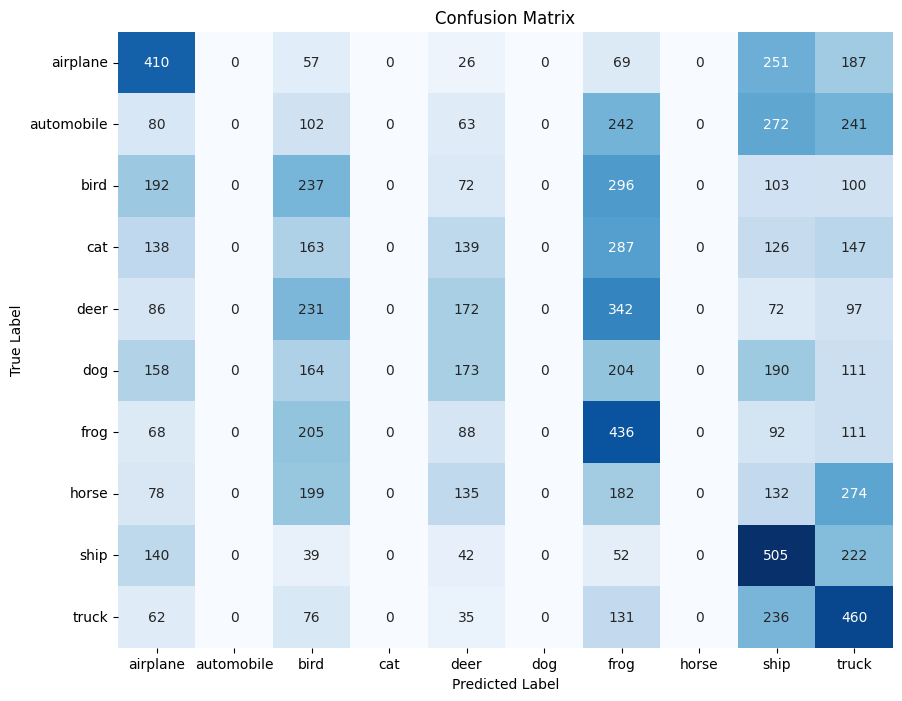

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 4.2.1 Number of features

In [ ]:
def calculate_accuracy(n_components,x_train_pca,y_train,X_test_pca,y_test):
  kmeans = KMeans(n_clusters=10,n_init=10)
  kmeans.fit(x_train_pca)
  cluster_labels = []
  for i in range(10):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
  cluster_indices = kmeans.predict(X_test_pca)
  y_pred = np.array(cluster_labels)[cluster_indices]
  accuracy = accuracy_score(y_test, y_pred)
  nmi_score = normalized_mutual_info_score(y_test,y_pred)
  return accuracy,nmi_score

In [ ]:
accuracy=[]
nmi_score=[]

In [ ]:
y_test=y_test.reshape(len(y_test),)

In [ ]:
for p in tqdm(range(1,100,5)):
  acc,nmi=calculate_accuracy(p,X_train_pca[:,:p+1],y_train,X_test_pca[:,:p+1],y_test)
  print(p,acc,nmi)
  accuracy.append(acc)
  nmi_score.append(nmi)

  5%|▌         | 1/20 [00:05<01:37,  5.15s/it]

1 0.2074 0.06860499417040415


 10%|█         | 2/20 [00:12<01:52,  6.25s/it]

6 0.2228 0.07475872839878953


 15%|█▌        | 3/20 [00:22<02:15,  7.97s/it]

11 0.2222 0.07521429073413682


 20%|██        | 4/20 [00:32<02:19,  8.71s/it]

16 0.2221 0.07569290120031394


 25%|██▌       | 5/20 [00:35<01:41,  6.75s/it]

21 0.2211 0.07481684665116514


 30%|███       | 6/20 [00:39<01:22,  5.93s/it]

26 0.2216 0.07516089918134763


 35%|███▌      | 7/20 [00:45<01:18,  6.05s/it]

31 0.2218 0.07529279360995086


 40%|████      | 8/20 [00:51<01:10,  5.89s/it]

36 0.2218 0.07529942830778641


 45%|████▌     | 9/20 [00:59<01:13,  6.69s/it]

41 0.2217 0.07493258489095582


 50%|█████     | 10/20 [01:08<01:13,  7.38s/it]

46 0.222 0.07521714944731146


 55%|█████▌    | 11/20 [01:17<01:09,  7.73s/it]

51 0.2218 0.07518955363168188


 60%|██████    | 12/20 [01:29<01:13,  9.16s/it]

56 0.2217 0.07504415934214632


 65%|██████▌   | 13/20 [01:39<01:04,  9.18s/it]

61 0.2218 0.07522272770110217


 70%|███████   | 14/20 [01:48<00:55,  9.22s/it]

66 0.222 0.07535075493281115


 75%|███████▌  | 15/20 [01:57<00:45,  9.09s/it]

71 0.2218 0.07516415695817555


 80%|████████  | 16/20 [02:08<00:38,  9.69s/it]

76 0.2217 0.0750894131813428


 85%|████████▌ | 17/20 [02:17<00:29,  9.71s/it]

81 0.2223 0.07544819187774864


 90%|█████████ | 18/20 [02:28<00:20, 10.10s/it]

86 0.2219 0.07525995518870894


 95%|█████████▌| 19/20 [02:41<00:10, 10.76s/it]

91 0.2222 0.07549719078734332


100%|██████████| 20/20 [02:55<00:00,  8.76s/it]

96 0.2221 0.07531334231100262


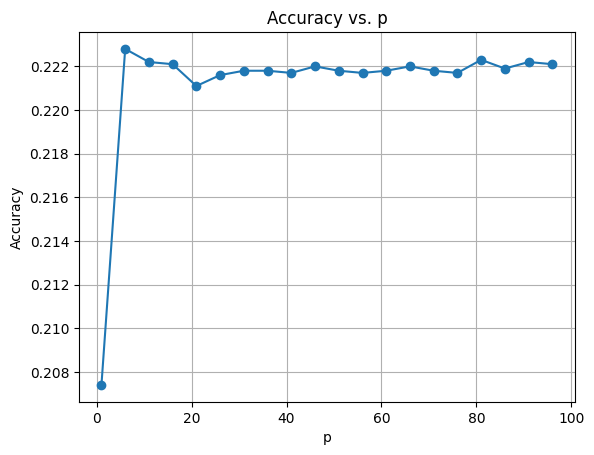

In [ ]:
p_values=[(1+5*i) for i in range(20)]
plt.plot(p_values, accuracy, marker='o', linestyle='-')
plt.title('Accuracy vs. p')
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

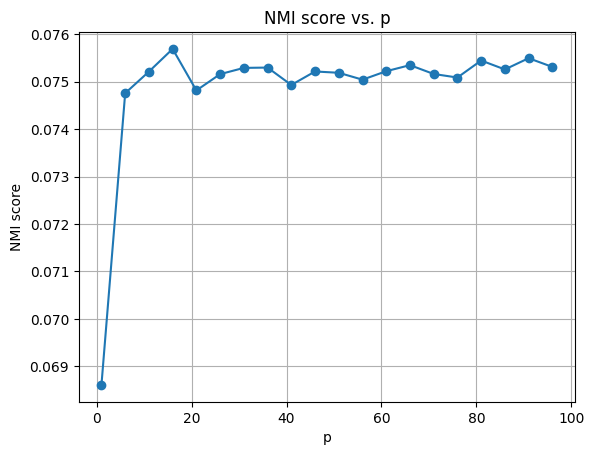

In [ ]:
p_values=[(1+5*i) for i in range(20)]
plt.plot(p_values, nmi_score, marker='o', linestyle='-')
plt.title('NMI score vs. p')
plt.xlabel('p')
plt.ylabel('NMI score')
plt.grid(True)
plt.show()

### 4.2.2 Number of Cluster

In [ ]:
# Apply PCA with
n_components=10
X_train_pca_red = X_train_pca[:,:n_components]

In [ ]:
X_train_pca_red.shape

(50000, 10)

In [ ]:
# Perform K-means clustering on the PCA-transformed training data
accuracy_clusters=[]
nmi_clusters=[]
for num_clusters in tqdm(range(10,51,5)):
  kmeans = KMeans(n_clusters=num_clusters,n_init=10)
  kmeans.fit(X_train_pca_red)
  # Assign class labels to clusters based on majority vote
  cluster_labels = []
  for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    cluster_labels.append(np.argmax(np.bincount(y_train[cluster_indices])))
  cluster_indices = kmeans.predict(X_test_pca[:,:n_components])
  y_pred = np.array(cluster_labels)[cluster_indices]
  # Calculate accuracy on the val set
  accuracy_val = accuracy_score(y_test, y_pred)
  nmi_score = normalized_mutual_info_score(y_test,y_pred)
  print(accuracy_val,nmi_score)
  accuracy_clusters.append(accuracy_val)
  nmi_clusters.append(nmi_score)

 11%|█         | 1/9 [00:02<00:19,  2.39s/it]

0.2227 0.07544470239715986


 22%|██▏       | 2/9 [00:07<00:26,  3.77s/it]

0.2422 0.08937607745489372


 33%|███▎      | 3/9 [00:13<00:30,  5.14s/it]

0.2588 0.09796618519401303


 44%|████▍     | 4/9 [00:22<00:32,  6.49s/it]

0.2666 0.10343877912811947


 56%|█████▌    | 5/9 [00:30<00:28,  7.06s/it]

0.268 0.09938437948367373


 67%|██████▋   | 6/9 [00:42<00:26,  8.69s/it]

0.2718 0.09923651211617297


 78%|███████▊  | 7/9 [00:56<00:21, 10.54s/it]

0.2754 0.10151336692006001


 89%|████████▉ | 8/9 [01:11<00:11, 11.89s/it]

0.2774 0.10816290938914633


100%|██████████| 9/9 [01:29<00:00,  9.92s/it]

0.2827 0.10699767371556898


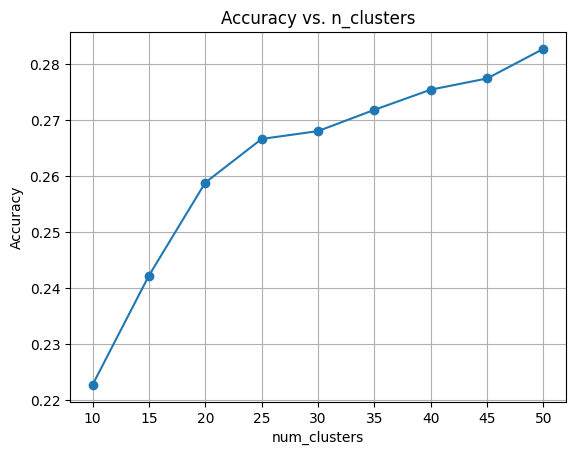

In [ ]:
num_clusters_arr=[(5*i)+10 for i in range(len(accuracy_clusters))]
plt.plot(num_clusters_arr, accuracy_clusters, marker='o', linestyle='-')
plt.title('Accuracy vs. n_clusters')
plt.xlabel('num_clusters')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

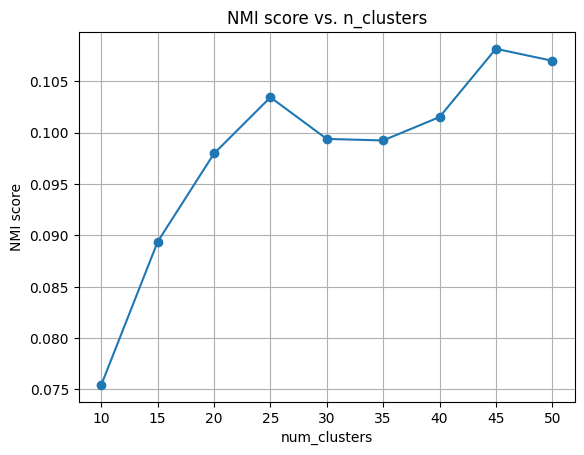

In [ ]:
num_clusters_arr=[(5*i)+10 for i in range(len(accuracy_clusters))]
plt.plot(num_clusters_arr, nmi_clusters, marker='o', linestyle='-')
plt.title('NMI score vs. n_clusters')
plt.xlabel('num_clusters')
plt.ylabel('NMI score')
plt.grid(True)
plt.show()

We can clearly see that due to the non linearity of data, classical clustering algorithms won't work